In [2]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dog-breed-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1171836%2F1983681%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240402%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240402T150454Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd65d5e0373a7c32f0abecfb01f8a928deb152ac1fc416fcfd55d3bde49365eccf5d63824199952ad773d7bec55997557c87b990f35a881872317f9e2c7431bb4963da9738b0bf9120e947f53f35f69b3a4eddb374f9fda6f0f9ddd618ca30be779538c14af8f5ca8f7fd7af74ec6a3894b680dca1d9feae28020854163cce0ce29ab44abb931b0fad9c6e5aeb7498bfe0c0d34c0253008d29ce754a489436ece5a95e0f28f3559b22a86108890050ec4a79d6a55913212335aeb56e074194b1243cdb2f7ba693ff3a3ea86926c8ef09790ff620233b86dbbe8a11ceb5657de1c0be5ab44341381042c7fd0d1fd14bf89ebdb8f9211e19c0af66929be3f1a38b5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')



[==================================================] 96177563 bytes downloaded
Downloaded and uncompressed: dog-breed-images
Data source import complete.


In [3]:
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


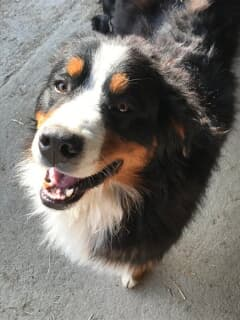

In [4]:
bernese_mountain_dog=[]
for file in os.listdir('../input/dog-breed-images/bernese_mountain_dog'):
    im = Image.open('../input/dog-breed-images/bernese_mountain_dog/' + file)
    bernese_mountain_dog.append(im)

display(random.choice(bernese_mountain_dog))


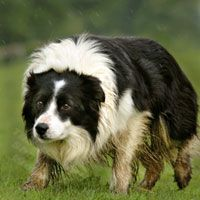

In [5]:
border_collie=[]
for file in os.listdir('../input/dog-breed-images/border_collie'):
    im = Image.open('../input/dog-breed-images/border_collie/' + file)
    border_collie.append(im)

display(random.choice(border_collie))


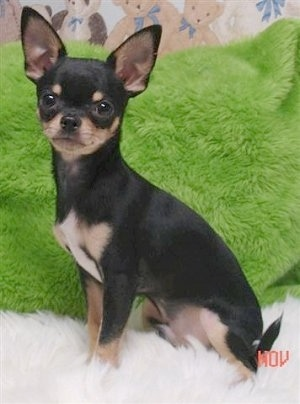

In [6]:
chihuahua=[]
for file in os.listdir('../input/dog-breed-images/chihuahua'):
    im = Image.open('../input/dog-breed-images/chihuahua/' + file)
    chihuahua.append(im)


display(random.choice(chihuahua))

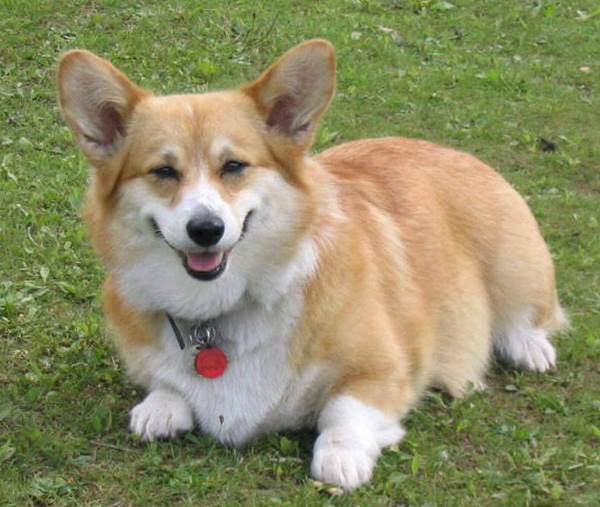

In [7]:
corgi=[]
for file in os.listdir('../input/dog-breed-images/corgi'):
    im = Image.open('../input/dog-breed-images/corgi/' + file)
    corgi.append(im)

display(random.choice(corgi))


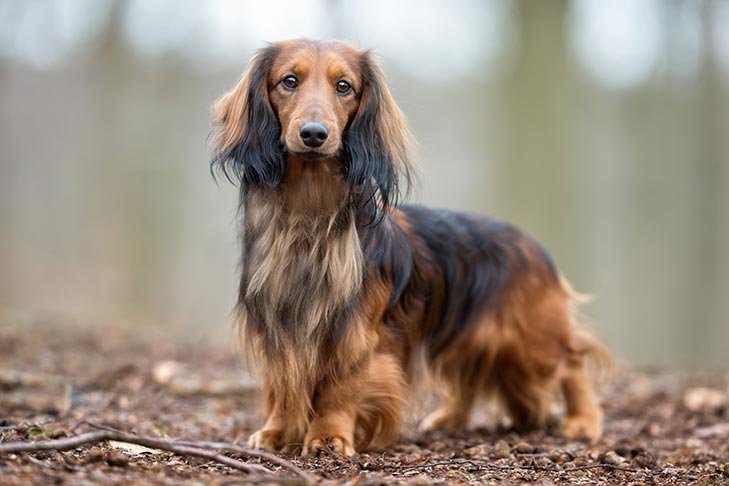

In [8]:
dachshund=[]
for file in os.listdir('../input/dog-breed-images/dachshund'):
    im = Image.open('../input/dog-breed-images/dachshund/' + file)
    dachshund.append(im)

display(random.choice(dachshund))


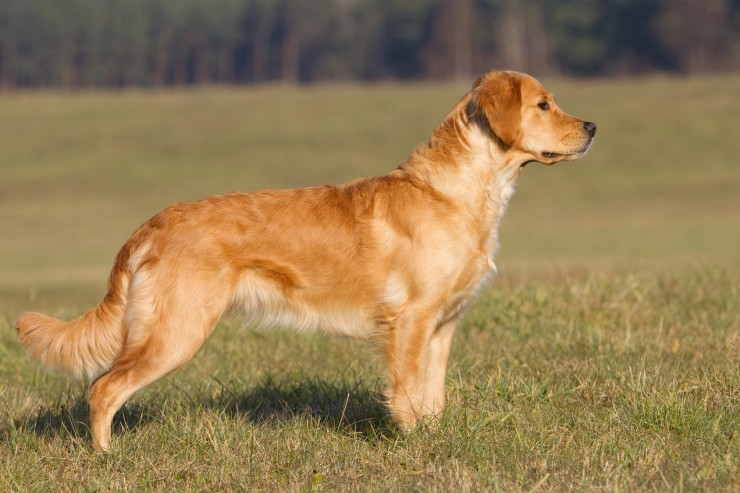

In [9]:
golden_retriever=[]
for file in os.listdir('../input/dog-breed-images/golden_retriever'):
    im = Image.open('../input/dog-breed-images/golden_retriever/' + file)
    golden_retriever.append(im)

display(random.choice(golden_retriever))


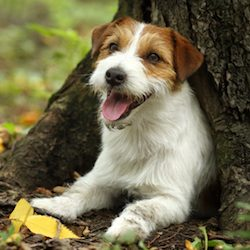

In [10]:
jack_russell=[]
for file in os.listdir('../input/dog-breed-images/jack_russell'):
    im = Image.open('../input/dog-breed-images/jack_russell/' + file)
    jack_russell.append(im)

display(random.choice(jack_russell))

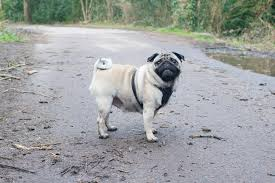

In [11]:
pug=[]
for file in os.listdir('../input/dog-breed-images/pug'):
    im = Image.open('../input/dog-breed-images/pug/' + file)
    pug.append(im)

display(random.choice(pug))


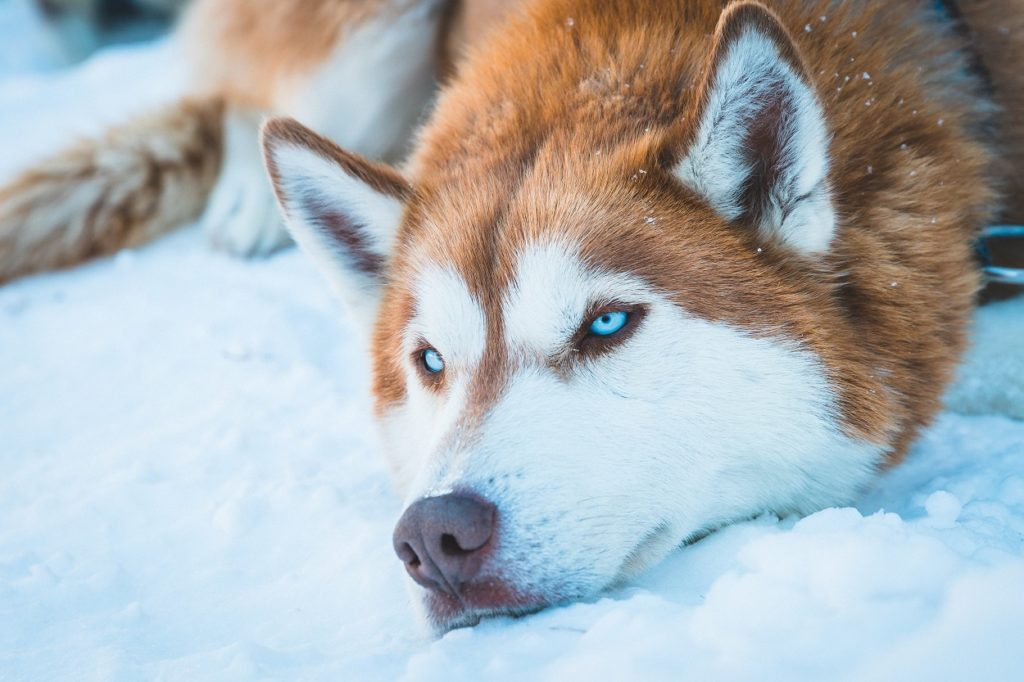

In [12]:
siberian_husky=[]
for file in os.listdir('../input/dog-breed-images/siberian_husky'):
    im = Image.open('../input/dog-breed-images/siberian_husky/' + file)
    siberian_husky.append(im)

display(random.choice(siberian_husky))


In [13]:
for i in [bernese_mountain_dog, border_collie, chihuahua, corgi, dachshund, golden_retriever, jack_russell, pug, siberian_husky]:
    for j in range(len(i)):
        width, height = i[j].size
        if width == height:
            i[j] = i[j].resize((256,256), Image.ANTIALIAS)
        else:
            if width > height:
                left = width/2 - height/2
                right = width/2 + height/2
                top = 0
                bottom = height
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.ANTIALIAS)
            else:
                left = 0
                right = width
                top = 0
                bottom = width
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.ANTIALIAS)


<ipython-input-13-a9f558fee3f5>:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  i[j] = i[j].resize((256,256), Image.ANTIALIAS)
<ipython-input-13-a9f558fee3f5>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  i[j] = i[j].resize((256,256), Image.ANTIALIAS)
<ipython-input-13-a9f558fee3f5>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  i[j] = i[j].resize((256,256), Image.ANTIALIAS)


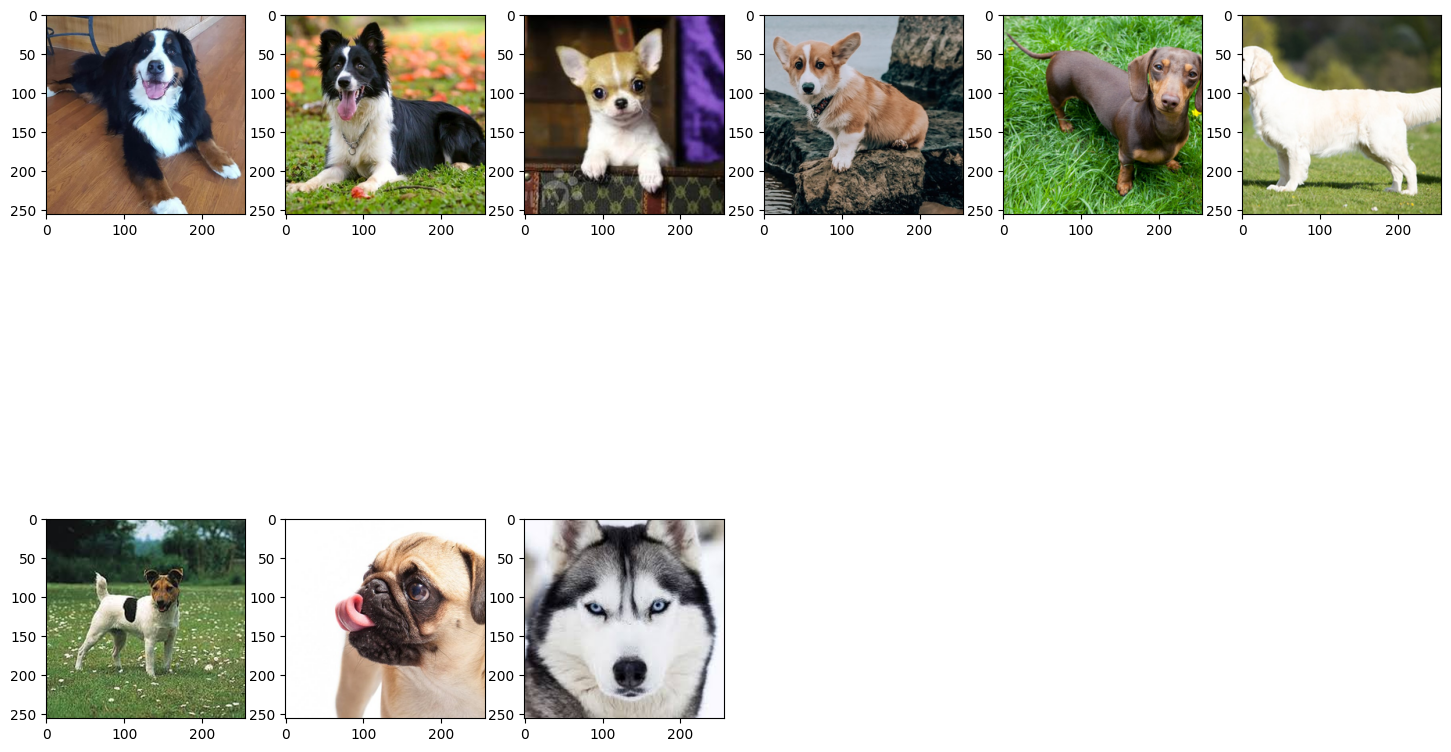

In [24]:
import math
images = []
for i in [bernese_mountain_dog, border_collie, chihuahua, corgi, dachshund, golden_retriever, jack_russell, pug, siberian_husky]:
    images.append(random.choice(i))

height = max(8, int(len(images)/5) * 8)
plt.figure(figsize=(18, 12))

for i, image in enumerate(images):
    plt.subplot(math.ceil(len(images) / 9) + 1, 6, i + 1)
    plt.imshow(image)


In [25]:
x = []
y = []

for i in [bernese_mountain_dog, border_collie, chihuahua, corgi, dachshund, golden_retriever, jack_russell, pug, siberian_husky]:
    for j in range(len(i)):
        ar = np.asarray(i[j])
        x.append(ar)
x = np.array(x)


for i in range(9):
    lists = [bernese_mountain_dog, border_collie, chihuahua, corgi, dachshund, golden_retriever, jack_russell, pug, siberian_husky]
    names = ['bernese_mountain_dog', 'border_collie', 'chihuahua', 'corgi', 'dachshund', 'golden_retriever', 'jack_russell', 'pug', 'siberian_husky']
    for j in range(len(lists[i])):
        y.append(names[i])

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)


In [26]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [27]:
model = Sequential()
model.add(Conv2D(28, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(56, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(112, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(224, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(448, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(896, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])



In [30]:
datagen = ImageDataGenerator(
      rescale=1./255.,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train = datagen.flow(x_train, y_train, batch_size=1)

test = test_datagen.flow(
        x_test, y_test,
        batch_size=1)

history = model.fit(train, epochs=5, validation_data=test)


Epoch 1/5
742/742 [==============================] - 163s 220ms/step - loss: 2.2824 - accuracy: 0.1078 - val_loss: 2.2244 - val_accuracy: 0.1084
Epoch 2/5
742/742 [==============================] - 162s 218ms/step - loss: 2.2473 - accuracy: 0.1119 - val_loss: 2.2087 - val_accuracy: 0.1205
Epoch 3/5
742/742 [==============================] - 164s 221ms/step - loss: 2.2323 - accuracy: 0.1280 - val_loss: 2.2010 - val_accuracy: 0.1084
Epoch 4/5
742/742 [==============================] - 160s 216ms/step - loss: 2.2266 - accuracy: 0.1240 - val_loss: 2.2021 - val_accuracy: 0.1205
Epoch 5/5
742/742 [==============================] - 160s 216ms/step - loss: 2.2216 - accuracy: 0.0943 - val_loss: 2.1984 - val_accuracy: 0.1205


In [31]:
def process_and_predict(file, name):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((256,256), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((256,256), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((256,256), Image.ANTIALIAS)

    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 256, 256, 3)

    maxnum = np.argmax(model.predict(ar))
    if maxnum == 0:
        prediction = 'Bernese Mountain Dog'
    if maxnum == 1:
        prediction = 'Border Collie'
    if maxnum == 2:
        prediction = 'Chihuahua'
    if maxnum == 3:
        prediction = 'Corgi'
    if maxnum == 4:
        prediction = 'Dachshund'
    if maxnum == 5:
        prediction = 'Golden Retriever'
    if maxnum == 6:
        prediction = 'Jack Russell Terrier'
    if maxnum == 7:
        prediction = 'Pug'
    if maxnum == 8:
        prediction = 'Siberian Husky'

    print(name + ' is a ' + prediction)
    return im
